In [2]:
library(dplyr)
library(ggplot2)

In [21]:
randToApptLength = function(x) {
    if (x < 0.10) {
        return (24)
    }
    if (x <  0.3) {
        return (27)
    }
    if (x < 0.7) {
        return (30)
    }
    if (x < 0.85) {
        return (33)
    }
    if (x < 0.95) {
        return (36)
    }
    return (39)
}

In [22]:
randToArrivalTime = function(x) {
    if (x < 0.10) {
        return (-15)
    }
    if (x <  0.35) {
        return (-5)
    }
    if (x < 0.85) {
        return (0)
    }
    if (x < 0.95) {
        return (10)
    }
    return (15)
}

In [23]:
generate_arrivals = function() {
    return ((1:16) * 30 + 510 + runif(16) %>% sapply(randToArrivalTime))
}
generate_arrivals()

[1] 535 585 595 630 660 690 705 750 790 810 850 880 900 930 970 985

In [24]:
generate_durations = function() {
    return (runif(16) %>% sapply(randToApptLength))
}
generate_durations()

[1] 30 36 33 30 36 36 30 33 33 24 30 36 24 30 27 30

In [82]:
run_sample = function() {
    arrivals = generate_arrivals()
    durations = generate_durations()
    t = 540
    rest = 0
    
    for (i in 1:16) {
        if (t < arrivals[i]) {
            rest = rest + (arrivals[i] - t)
            t = arrivals[i]
        }
        t = t + durations[i]
    }
    
    return (list(duration=t-540, rest=rest))
}

In [141]:
qn_a = function(size=1000) {
    df = data.frame(duration=numeric(), rest=numeric())
    for (i in 1:size) {
        x = run_sample()
        df = bind_rows(df, x)
    }
    return (list(duration=mean(df$duration), rest=mean(df$rest)))
}

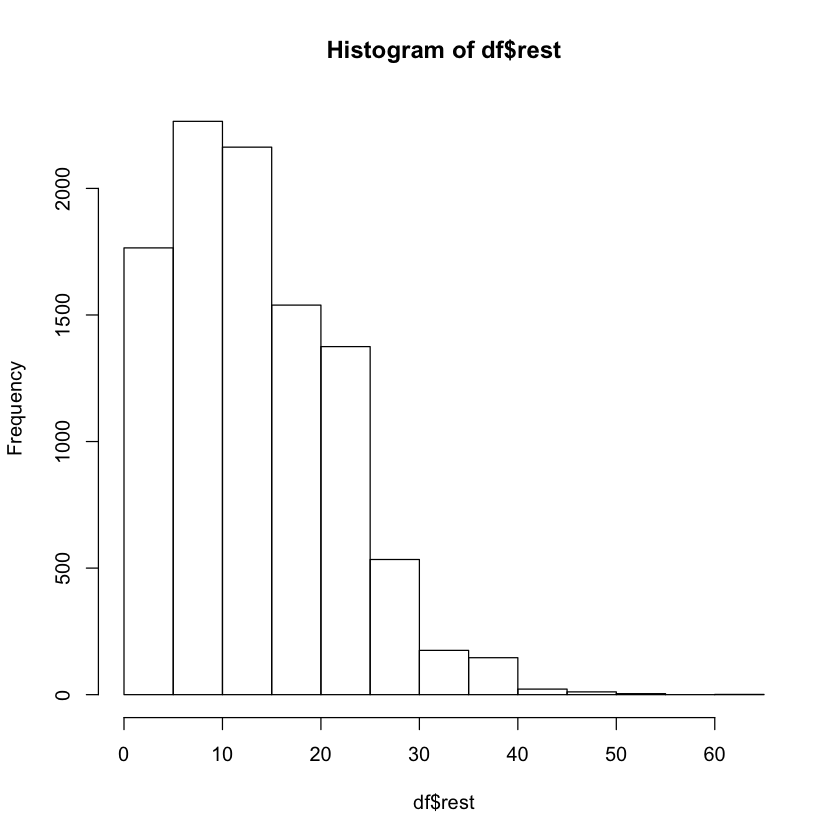

In [112]:
hist(df$rest)

In [113]:
run_sample_helper = function() {
    arrivals = generate_arrivals()
    durations = generate_durations()
    t = 540
    rest = 0
    
    for (i in 1:16) {
        if (t < (arrivals[i]+10)) {
            rest = rest + (arrivals[i] + 10 - t)
            t = arrivals[i]+10
        }
        t = t + (durations[i] - 5)
    }
    
    return (list(duration=t-540, rest=rest))
}

In [136]:
qn_b = function(size=1000) {
    df = data.frame(duration=numeric(), rest=numeric())
    for (i in 1:size) {
        x = run_sample_helper()
        df = bind_rows(df, x)
    }   
    return (list(duration=mean(df$duration), rest=mean(df$rest)))
}

In [128]:
generate_checks = function() {
    rnorm(16, 10.5, 1.5)
}

In [129]:
run_sample_helper_norm = function() {
    arrivals = generate_arrivals()
    durations = generate_durations()
    checks = generate_checks()
    t = 540
    rest = 0
    
    for (i in 1:16) {
        if (t < (arrivals[i] + checks[i])) {
            rest = rest + (arrivals[i] + checks[i] - t)
            t = arrivals[i] + checks[i]
        }
        t = t + (durations[i] - 5)
    }
    
    return (list(duration=t-540, rest=rest))
}

In [133]:
qn_c = function(size=1000) {
    df = data.frame(duration=numeric(), rest=numeric())
    for (i in 1:size) {
        x = run_sample_helper_norm()
        df = bind_rows(df, x)
    }
    return (list(duration=mean(df$duration), rest=mean(df$rest)))
}

In [143]:
optimize_a = function(error.tolerance=0.1) {
    size = 1000
    while (T) {
        first = qn_a(size=size)
        second = qn_a(size=size)
        if (abs(first$duration - second$duration) < error.tolerance && 
            abs(first$rest - second$rest) < error.tolerance) {
            return (qn_a(size=size))
        }
        size = size * 5
    }
}

optimize_b = function(error.tolerance=0.1) {
    size = 1000
    while (T) {
        first = qn_b(size=size)
        second = qn_b(size=size)
        if (abs(first$duration - second$duration) < error.tolerance && 
            abs(first$rest - second$rest) < error.tolerance) {
            return (qn_b(size=size))
        }
        size = size * 5
    }
}

optimize_c = function(error.tolerance=0.1) {
    size = 1000
    while (T) {
        first = qn_c(size=size)
        second = qn_c(size=size)
        if (abs(first$duration - second$duration) < error.tolerance && 
            abs(first$rest - second$rest) < error.tolerance) {
            return (qn_c(size=size))
        }
        size = size * 5
    }
}

In [144]:
optimize_a()

$duration
[1] 498.4934

$rest
[1] 13.84836

In [145]:
optimize_b()

$duration
[1] 487.6922

$rest
[1] 82.83128

In [147]:
optimize_c()

$duration
[1] 488.2421

$rest
[1] 83.62095